# Universidad Autónoma de Yucatán

## Facultad de Matemáticas

### Machine Learning

**Teacher:** Dr. Victor Uc Cetina

**Student:** Dayan Bravo Fraga

# Plot Results **(Step 3 of 4)**

## Clone and load project from GitHub (only for Colab)

In [1]:
import sys
import sys
import os

in_colab: bool = 'google.colab' in sys.modules
if in_colab:
    print('Is running in Colab')
    if not os.path.isdir('machine_learning'):
        print("Downloading project")
        get_ipython().system('git clone https://github.com/dayan3847/machine_learning')
        sys.path.insert(0, './machine_learning/')
    else:
        get_ipython().system('git -C ./machine_learning fetch')
        get_ipython().system('git -C ./machine_learning rebase')
    if not os.path.isdir('reports'):
        print('Copying reports folder')
        get_ipython().system('cp -r ./machine_learning/dayan3847/stochastic_gradient_descent/colab/reports ./')
else:
    print('Is not running in Colab')

Is not running in Colab


## Import libraries

In [2]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

## Import History Generated

Paste the report number copied from the notebook:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dayan3847/machine_learning/blob/master/dayan3847/stochastic_gradient_descent/colab/1_generate_artificial_data_points.ipynb)

In [3]:
report_number: str = '20230514144011475656'

In [4]:
data_points: np.array = np.loadtxt(f'reports/{report_number}/data_points.csv', delimiter=',').T

In [5]:
print('\033[92m' + 'loading data... ' + '\033[0m')
history_df: pd.DataFrame = pd.read_csv(f'reports/{report_number}/history.csv')
print('\033[92m' + 'data loaded' + '\033[0m')

loading data... 
data loaded


In [6]:
function_str: str = open(f'reports/{report_number}/data_points_base_function.txt', 'r').read()
function: sp.Expr = sp.sympify(function_str)
print('\033[32m' + 'Imported base function:' + '\033[0m')
function

Imported base function:


sin(2*pi*x)

## Plot Data

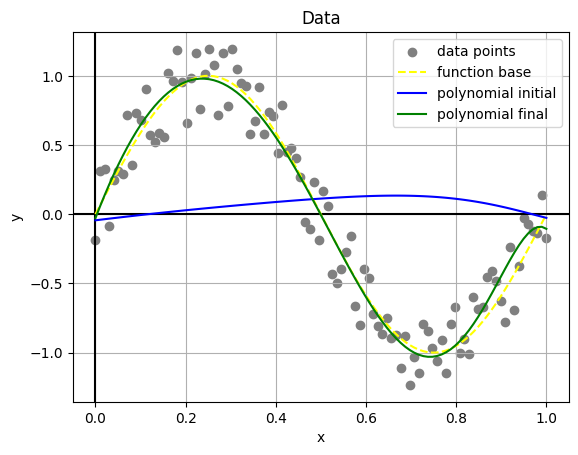

In [7]:
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(color='black')
plt.axhline(color='black')
# Data Points
plt.scatter(data_points[0], data_points[1], color='gray', label='data points')
# Function Base
x_ = np.linspace(0, 1, 100)
y_function_base = [function.subs('x', x_i) for x_i in x_]
plt.plot(x_, y_function_base, label='function base', color='yellow', linestyle='--')

history_polynomial = history_df['polynomial'].tolist()
# Polynomial Initial
y_function_base = [sp.sympify(history_polynomial[0]).subs('x', x_i) for x_i in x_]
plt.plot(x_, y_function_base, label='polynomial initial', color='blue')
# Polynomial Final
y_function_base = [sp.sympify(history_polynomial[-1]).subs('x', x_i) for x_i in x_]
plt.plot(x_, y_function_base, label='polynomial final', color='green')

plt.legend()
plt.grid()
plt.savefig(f'reports/{report_number}/result_polynomial.png')
plt.show()

## Plot Error

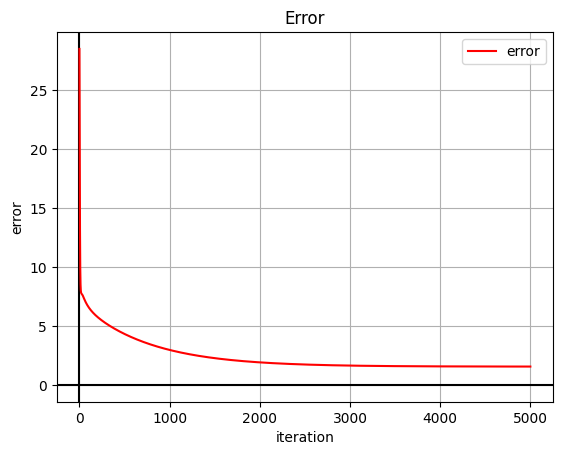

In [8]:
plt.title('Error')
plt.xlabel('iteration')
plt.ylabel('error')
plt.axvline(color='black')
plt.axhline(color='black')
plt.plot(history_df['error'], label='error', color='red')
plt.legend()
plt.grid()
plt.savefig(f'reports/{report_number}/result_error.png')
plt.show()